In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("ETHUSD.csv",index_col=[0],parse_dates=[0])

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479


In [ ]:
projection = 10

In [ ]:
df['Prediction'] = df['Close'].shift(-projection)

In [ ]:
df.tail(15)

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2023-06-04,1892.398193,1912.205688,1885.651855,1890.513550,3747042696,1650.519287
2023-06-05,1890.417603,1890.640503,1780.211548,1811.828369,9246593033,1665.519775
2023-06-06,1810.581421,1896.222656,1801.405273,1884.494873,8704411776,1716.668823
2023-06-07,1884.372925,1893.809082,1822.303101,1832.395996,7919894455,1727.204102
2023-06-08,1832.513550,1861.136108,1830.165039,1846.301880,4536041931,1720.577515
2023-06-09,1846.077881,1854.824951,1828.544556,1840.225220,4610831509,NaN
2023-06-10,1840.391968,1844.785645,1721.443115,1752.384766,10788500406,NaN
2023-06-11,1752.527588,1776.847168,1741.110474,1753.415283,4559112981,NaN
2023-06-12,1753.075439,1757.659790,1722.906372,1742.528687,6031384958,NaN


In [ ]:
x = np.array(df['Close'])

In [ ]:
x = x[:-projection]

In [ ]:
y = np.array(df['Prediction'])
y = y[:-projection]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
x_train

array([[ 126.36122131],
       [ 379.48403931],
       [1539.92675781],
       ...,
       [3587.97485352],
       [1823.44934082],
       [1848.45825195]])

In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

In [ ]:
xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = xg_reg.predict(x_test)

In [ ]:
y_pred

array([2994.3208  , 1217.5924  ,  267.74564 ,  723.4223  ,  256.38834 ,
        188.48045 , 3726.198   ,  259.69022 , 3069.6038  , 3375.6025  ,
        165.76262 , 2566.991   ,  412.1644  , 4288.427   ,  492.71777 ,
        219.44801 , 1828.1776  , 1979.6306  , 1009.0655  , 1822.9138  ,
        397.16583 , 1917.9092  , 1828.1776  ,  759.16565 , 1822.9138  ,
        211.4261  ,  144.70937 , 1613.8901  ,  191.32959 , 1217.5924  ,
       2768.4631  , 3774.7346  ,  135.95161 ,  211.60153 , 1231.3135  ,
        168.20229 ,  248.45729 ,  143.05826 ,  374.7858  , 2083.4182  ,
       1629.8567  , 1815.0852  ,  209.89876 ,  191.32959 ,  374.7858  ,
       2074.044   ,  130.77544 ,  545.89685 , 3223.5     , 2997.6511  ,
       3644.33    ,  361.98245 , 2997.2712  ,  117.20649 ,  203.53517 ,
        496.72742 ,  612.0411  , 1252.283   , 1302.0203  , 1797.9497  ,
        695.3949  ,  602.7966  ,  251.85141 , 2843.3953  ,  412.1644  ,
       2322.3528  , 1789.2076  , 1371.6129  ,  149.90054 , 1252.

In [ ]:
xg_reg.score(x_train,y_train)

0.9921388975546115

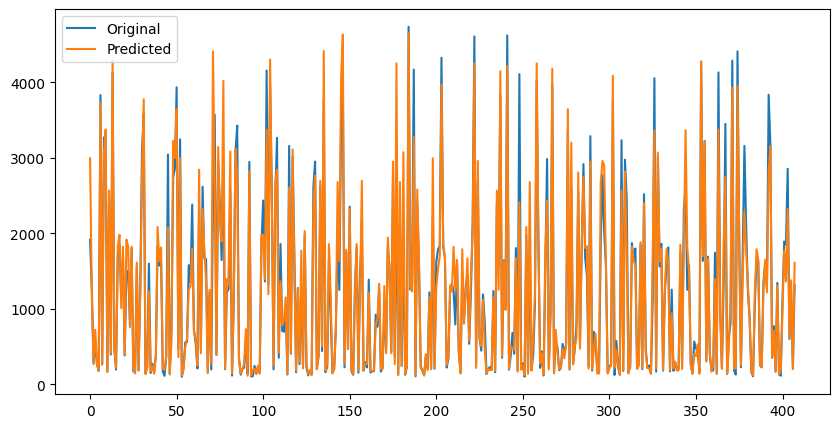

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label="Original")
plt.plot(y_pred,label="Predicted")
plt.legend(fontsize = 10)
plt.show()

In [ ]:
sum_residual = 0
for i in range(len(y_test)):
  sum_residual = sum_residual + (y_test[i][0] - y_pred[i])**2


In [ ]:
sum1 = 0
for i in range(len(y_test)):
  sum1 = sum1 + y_test[i][0]
mean = sum1/len(y_test)

In [ ]:
mean

1239.762375644609

In [ ]:
sum_total = 0
for i in range(len(y_test)):
  sum_total = sum_total + (y_test[i][0] - mean)**2

In [ ]:
r_squared = 1 - (sum_residual/sum_total)

In [ ]:
r_squared

0.9320020547800354

In [ ]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_test,y_pred)

In [ ]:
R_squared

0.9320020547800354